<a href="https://colab.research.google.com/github/ShashwatVv/naiveDL/blob/main/ManipulatingRegressionSlopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression using ANN.
continuing from ["here"](https://colab.research.google.com/drive/1zTy_7Z5rfKHPKTTCWyou5EemqL8yBqih)

In [1]:
#importing libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')
print('modules imported')

modules imported


In [10]:
def build_and_train(x, y, learning_rate, n_epochs):
  
  ## building
  model = nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
      )
  
  ## optimizer --> stochastic gradient descent
  ## loss--> Mean Squared Error

  loss_fun = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  
  losses = torch.zeros(n_epochs)

  for i in range(n_epochs):
    y_hat = model(x)
    ##forward prop has been done

    loss = loss_fun(y_hat, y)
    losses[i] = loss
    ##loss has been computed

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ##back prop has been done

    ## end for loop

  predictions = model(x)

  return predictions, losses
  

In [14]:
## we have to create data with a generic function such that the slope could be varied

def create_data(slope, N, scale=2):
  
  x = torch.randn(N, 1)
  y = slope*x + torch.randn(N,1)/scale

  return x, y

Text(0.5, 1.0, 'Prediction-data-correlation  0.66')

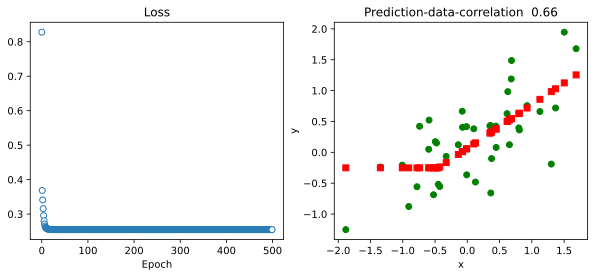

In [20]:
x, y = create_data(0.75, 40)
yhat, losses = build_and_train(x, y, 0.5, 500)

fig, ax = plt.subplots(1,2, figsize=(10,4))

corr = np.corrcoef(y.T, yhat.detach().T)[0,1]

ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.15)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'go', label='Actual Data')
ax[1].plot(x, yhat.detach(), 'rs', label='Predicted Data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Prediction-data-correlation {corr: .2f}')